In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ybifoundation/Dataset/main/Car%20Price.csv')
print(df.head())
print(df.info())
print(df.describe())

     Brand                     Model  Year  Selling_Price  KM_Driven    Fuel  \
0   Maruti             Maruti 800 AC  2007          60000      70000  Petrol   
1   Maruti  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2  Hyundai      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3   Datsun    Datsun RediGO T Option  2017         250000      46000  Petrol   
4    Honda     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  Seller_Type Transmission         Owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 n

In [3]:
print(df[['Brand']].value_counts())
print(df[['Model']].value_counts())
print(df[['Fuel']].value_counts())
print(df[['Seller_Type']].value_counts())
print(df[['Transmission']].value_counts())
print(df[['Owner']].value_counts())

Brand        
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Ambassador          4
Volvo               4
Jeep                3
OpelCorsa           2
MG                  2
Isuzu               1
Force               1
Daewoo              1
Kia                 1
dtype: int64
Model                               
Maruti Swift Dzire VDI                  69
Maruti Alto 800 LXI                     59
Maruti Alto LXi                         47
Hyundai EON Era Plus                    35
Maruti Alto LX                          35
                                        ..
Mahindra KUV 100 G80 K4 Plus            

In [4]:
print(df.columns)
print(df.shape)

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')
(4340, 9)


In [5]:
df.replace({'Fuel':{'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4}}, inplace = True)
df.replace({'Seller_Type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}}, inplace = True)
df.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace = True)
df.replace({'Owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace = True)

In [7]:
y = df['Selling_Price']
print(y.shape)
print(y)

(4340,)
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: Selling_Price, Length: 4340, dtype: int64


In [12]:
X = df[['Year', 'KM_Driven', 'Selling_Price', 'Transmission', 'Owner']]
print(X.shape)
print(X)

(4340, 5)
      Year  KM_Driven  Selling_Price  Transmission  Owner
0     2007      70000          60000             0      0
1     2007      50000         135000             0      0
2     2012     100000         600000             0      0
3     2017      46000         250000             0      0
4     2014     141000         450000             0      1
...    ...        ...            ...           ...    ...
4335  2014      80000         409999             0      1
4336  2014      80000         409999             0      1
4337  2009      83000         110000             0      1
4338  2016      90000         865000             0      0
4339  2016      40000         225000             0      0

[4340 rows x 5 columns]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 19529)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)
print(y_pred.shape)
print(y_pred)

(1302,)
[140355.01619396 263488.17675578 509754.4978794  ... 407143.53074456
 550798.88473334 464605.67234007]


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

15241121119.465015
58454.064073833615
0.9648236272386747


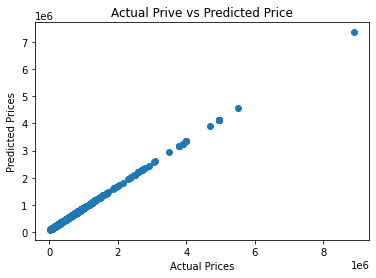

In [26]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prive vs Predicted Price')
plt.show()

In [34]:
df_new = df.sample(1)
print(df_new)
print(df_new.shape)


     Brand            Model  Year  Selling_Price  KM_Driven  Fuel  \
3678  Tata  Tata Indigo CR4  2012         135000     158000     1   

      Seller_Type  Transmission  Owner  
3678            0             0      2  
(1, 9)


In [35]:
X_new = df_new[['Year', 'KM_Driven', 'Selling_Price', 'Transmission', 'Owner']]
X_new = sc.fit_transform(X_new)
y_pred_new = lr.predict(X_new)
y_pred_new

array([493141.13857801])